In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-shopping-trends-dataset/shopping_trends.csv
/kaggle/input/customer-shopping-trends-dataset/shopping_trends_updated.csv


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [52]:
df= pd.read_csv('/kaggle/input/customer-shopping-trends-dataset/shopping_trends.csv')
df=pd.read_csv('/kaggle/input/customer-shopping-trends-dataset/shopping_trends_updated.csv')

In [53]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [54]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [55]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [57]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [58]:
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

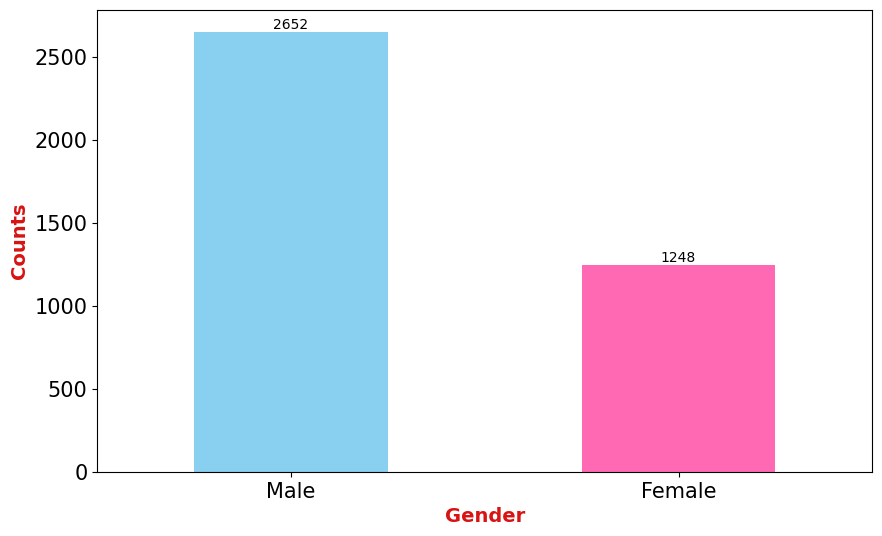

In [59]:
plt.figure(figsize = (10, 6))

ax = df["Gender"].value_counts().plot(kind = 'bar', color = colors[:2], rot = 0)
ax.set_xticklabels(('Male', 'Female'))

for p in ax.patches:
#     print(p)
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
    
# Horizontal asymptote (HA) - It is a horizontal line and hence its equation is of the form y = k. 
# Vertical asymptote (VA) - It is a vertical line and hence its equation is of the form x = k
    
plt.xlabel('Gender', weight = "bold", color = "#D71313", fontsize = 14)
plt.ylabel('Counts', weight = "bold", color = "#D71313", fontsize = 14);

In [60]:
def categorize_age(age):
    if 18 <= age < 30:
        return 'Young'
    elif 30 <= age < 50:
        return 'Mid-age'
    elif 50 <= age < 70:
        return 'Old'

In [61]:
df['Age_category'] = df['Age'].apply(categorize_age)

<Axes: xlabel='Age_category', ylabel='count'>

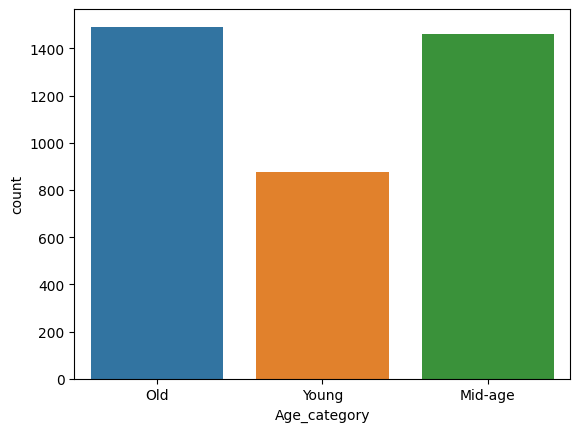

In [62]:
sns.countplot(data=df,x='Age_category')

In [63]:
df.groupby('Category')['Item Purchased'].value_counts()

Category     Item Purchased
Accessories  Jewelry           171
             Belt              161
             Sunglasses        161
             Scarf             157
             Hat               154
             Handbag           153
             Backpack          143
             Gloves            140
Clothing     Blouse            171
             Pants             171
             Shirt             169
             Dress             166
             Sweater           164
             Socks             159
             Skirt             158
             Shorts            157
             Hoodie            151
             T-shirt           147
             Jeans             124
Footwear     Sandals           160
             Shoes             150
             Sneakers          145
             Boots             144
Outerwear    Jacket            163
             Coat              161
Name: count, dtype: int64

In [64]:
amount= df.groupby('Gender')['Purchase Amount (USD)'].sum()
amount

Gender
Female     75191
Male      157890
Name: Purchase Amount (USD), dtype: int64

In [65]:
payment_methods = df['Payment Method'].unique()
count_method= df['Payment Method'].value_counts().reset_index()
count_method


,Payment Method,count
0,PayPal,677
1,Credit Card,671
2,Cash,670
3,Debit Card,636
4,Venmo,634
5,Bank Transfer,612


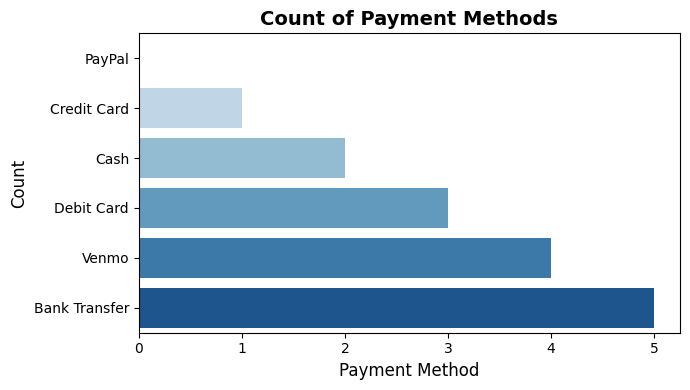

In [66]:
count_method = count_method.reset_index()
plt.figure(figsize=(7,4))
sns.barplot(x='index', y='Payment Method', data=count_method, palette='Blues')
plt.title('Count of Payment Methods', fontsize=14, fontweight='bold')
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

In [67]:
df.groupby('Season')['Item Purchased'].value_counts().sort_values(ascending=False)[:8]

Season  Item Purchased
Fall    Jacket            54
Spring  Sweater           52
Winter  Sunglasses        52
        Pants             51
        Shirt             50
Fall    Hat               50
Summer  Pants             50
Winter  Hoodie            48
Name: count, dtype: int64

In [68]:
df.groupby('Category')['Review Rating'].mean()

Category
Accessories    3.768629
Clothing       3.723143
Footwear       3.790651
Outerwear      3.746914
Name: Review Rating, dtype: float64

In [69]:
ax=pd.crosstab(df["Discount Applied"],df["Category"])
ax.sort_values(by="Discount Applied",ascending=False)

Category,Accessories,Clothing,Footwear,Outerwear
Discount Applied,,,,
Yes,543,731,259,144
No,697,1006,340,180


In [70]:
pd.crosstab(df['Season'],df['Category'],values=df['Purchase Amount (USD)'],aggfunc='sum')

Category,Accessories,Clothing,Footwear,Outerwear
Season,,,,
Fall,19874,26220,8665,5259
Spring,17007,27692,9555,4425
Summer,19028,23078,9393,4278
Winter,18291,27274,8480,4562


In [71]:
df['Subscription Status'].value_counts()

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64

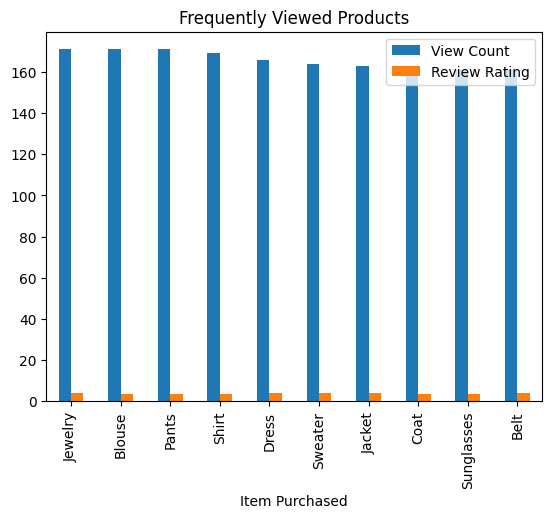

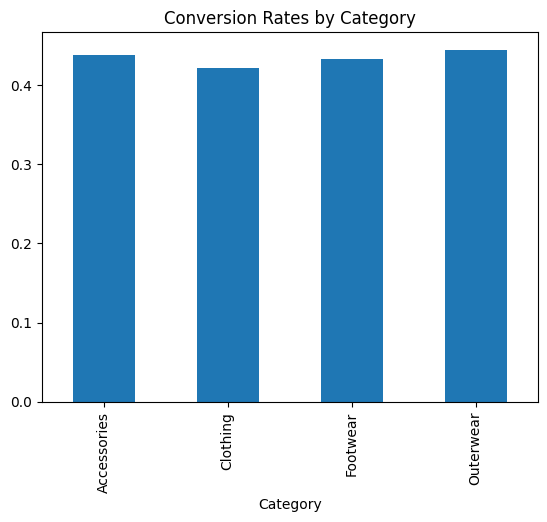

In [72]:
view_to_purchase = df.groupby('Item Purchased').agg({
    'Purchase Amount (USD)': 'count',
    'Review Rating': 'mean'
}).rename(columns={'Purchase Amount (USD)': 'View Count'})
view_to_purchase.sort_values(by='View Count', ascending=False).head(10).plot(kind='bar')
plt.title('Frequently Viewed Products')
plt.show()
df['Discount Applied'] = df['Discount Applied'].apply(lambda x: 1 if x == 'Yes' else 0)
conversion_rate = df.groupby('Category')['Discount Applied'].mean()
conversion_rate.plot(kind='bar')
plt.title('Conversion Rates by Category')
plt.show()



In [73]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mlxtend.frequent_patterns import apriori, association_rules

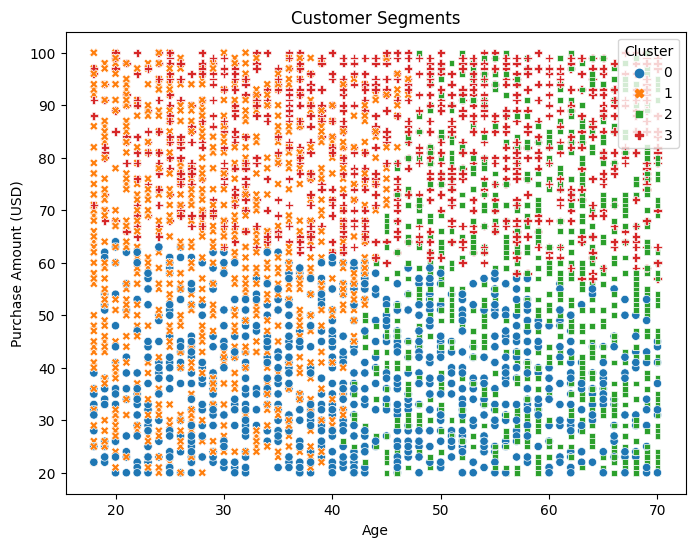

In [74]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
cluster_data = df[['Age', 'Previous Purchases', 'Purchase Amount (USD)']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)
kmeans = KMeans(n_clusters=4, n_init='auto', random_state=42)  # Updated for future versions
df['Cluster'] = kmeans.fit_predict(scaled_data)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df['Age'],
    y=df['Purchase Amount (USD)'],
    hue=df['Cluster'],
    palette='tab10',
    style=df['Cluster']
)
plt.title('Customer Segments')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.legend(title='Cluster')
plt.show()



In [75]:
basket = df.pivot_table(index='Customer ID', columns='Item Purchased', aggfunc='size', fill_value=0)
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.2)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


In [76]:
from sklearn.metrics.pairwise import cosine_similarity
item_user_matrix = df.pivot_table(index='Item Purchased', columns='Customer ID', values='Purchase Amount (USD)', fill_value=0)

item_similarity = cosine_similarity(item_user_matrix)
item_similarity_df = pd.DataFrame(item_similarity, index=item_user_matrix.index, columns=item_user_matrix.index)

def recommend_items(item, n=5):
    similar_items = item_similarity_df[item].sort_values(ascending=False).head(n + 1).iloc[1:]
    return similar_items
print(recommend_items('Jeans'))


Item Purchased
Backpack      0.0
Pants         0.0
Sweater       0.0
Sunglasses    0.0
Socks         0.0
Name: Jeans, dtype: float64


In [77]:
low_rated_products = df[df['Review Rating'] < 3.0]['Item Purchased'].value_counts()
print("Products with low reviews:\n", low_rated_products)

print("Consider improving product descriptions or offering discounts for these products:")
print(low_rated_products.index.tolist())


Products with low reviews:
 Item Purchased
Shirt         39
Coat          35
Pants         34
Scarf         33
Shorts        33
Sweater       31
Sandals       31
Jewelry       28
Handbag       28
Blouse        28
Socks         28
Jeans         28
Hoodie        28
Sunglasses    27
Jacket        27
Belt          26
Skirt         26
Dress         24
Gloves        24
Sneakers      23
T-shirt       23
Shoes         22
Boots         22
Backpack      21
Hat           16
Name: count, dtype: int64
Consider improving product descriptions or offering discounts for these products:
['Shirt', 'Coat', 'Pants', 'Scarf', 'Shorts', 'Sweater', 'Sandals', 'Jewelry', 'Handbag', 'Blouse', 'Socks', 'Jeans', 'Hoodie', 'Sunglasses', 'Jacket', 'Belt', 'Skirt', 'Dress', 'Gloves', 'Sneakers', 'T-shirt', 'Shoes', 'Boots', 'Backpack', 'Hat']


In [78]:
from sklearn.model_selection import train_test_split
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate
reader = Reader(rating_scale=(1, 5))
recommendation_data = df[['Customer ID', 'Item Purchased', 'Review Rating']]
recommendation_data.columns = ['userID', 'itemID', 'rating']
recommendation_dataset = Dataset.load_from_df(recommendation_data, reader)
trainset = recommendation_dataset.build_full_trainset()
svd = SVD()
svd.fit(trainset)
cross_validate(svd, recommendation_dataset, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.7205  0.7169  0.7163  0.7173  0.7204  0.7183  0.0018  
MAE (testset)     0.6209  0.6237  0.6185  0.6165  0.6223  0.6204  0.0026  
Fit time          0.07    0.07    0.06    0.06    0.06    0.07    0.01    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    


{'test_rmse': array([0.72054094, 0.71688496, 0.71632669, 0.71727297, 0.72043   ]),
 'test_mae': array([0.62091043, 0.6237108 , 0.61845388, 0.61653657, 0.62227504]),
 'fit_time': (0.07193565368652344,
  0.07341480255126953,
  0.06238436698913574,
  0.06078815460205078,
  0.060576438903808594),
 'test_time': (0.007167339324951172,
  0.005797386169433594,
  0.0058062076568603516,
  0.005850076675415039,
  0.005769491195678711)}